<a href="https://colab.research.google.com/github/xRentino/CS132-Poverty/blob/main/combined_exploratory_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Color settings
colors = ["#648FFF", "#785EF0", "#A11C5D", "#FE6100", "#FFB000", "#000000", "#FFFFFF"]
colors_grad = sns.color_palette('flare_r', 12)
colors_heat1 = sns.color_palette('flare_r', as_cmap=True)
colors_heat2 = sns.diverging_palette(315, 261, s=74, l=50, center='dark', as_cmap=True)
color_bg = "#1B181C"
color_text = "#FFFFFF"

# Plot settings
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams["figure.figsize"] = (16, 8)
mpl.rcParams['font.family'] = 'Roboto'
mpl.rcParams['figure.titlesize'] = 32
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['axes.titlepad'] = 72
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['ytick.minor.width'] = 0
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False
mpl.rcParams['legend.title_fontsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'
mpl.rcParams["figure.facecolor"] = color_bg
mpl.rcParams["axes.facecolor"] = color_bg
mpl.rcParams["savefig.facecolor"] = color_bg
mpl.rcParams['text.color'] = color_text
mpl.rcParams['axes.labelcolor'] = color_text
mpl.rcParams['xtick.color'] = color_text
mpl.rcParams['ytick.color'] = color_text
mpl.rcParams['axes.edgecolor'] = color_text


In [4]:
# Load Dataset and Data Cleaning
poverty_data = pd.read_csv("CS132_DataSheet-graph_data.csv")
poverty_data['Year'] = poverty_data['Year'].ffill()

In [5]:
# Extract data
x = poverty_data['Year']
y_poor = poverty_data['Poor Respondent Count']
y_not_poor = poverty_data['Not Poor Respondent Count']
y_borderline = poverty_data['Borderline Respondent Count']

In [6]:
# Data Split and Reshape
# Poor
X_train_poor, X_test_poor, Y_train_poor, Y_test_poor = train_test_split(x, y_poor, test_size=0.5, random_state=42)
X_train_poor = np.array(X_train_poor).reshape(-1, 1)
X_test_poor = np.array(X_test_poor).reshape(-1, 1)
Y_test_poor = np.array(Y_test_poor)

# Not Poor
X_train_not_poor, X_test_not_poor, Y_train_not_poor, Y_test_not_poor = train_test_split(x, y_not_poor, test_size=0.5, random_state=42)
X_train_not_poor = np.array(X_train_not_poor).reshape(-1, 1)
X_test_not_poor = np.array(X_test_not_poor).reshape(-1, 1)
Y_test_not_poor = np.array(Y_test_not_poor)

# Borderline
X_train_borderline, X_test_borderline, Y_train_borderline, Y_test_borderline = train_test_split(x, y_borderline, test_size=0.5, random_state=42)
X_train_borderline = np.array(X_train_borderline).reshape(-1, 1)
X_test_borderline = np.array(X_test_borderline).reshape(-1, 1)
Y_test_borderline = np.array(Y_test_borderline)

In [7]:
# Regression Models
# Poor
model_poor = linear_model.LinearRegression()
model_poor.fit(X_train_poor, Y_train_poor)
Y_pred_poor = model_poor.predict(X_test_poor)

# Not Poor
model_not_poor = linear_model.LinearRegression()
model_not_poor.fit(X_train_not_poor, Y_train_not_poor)
Y_pred_not_poor = model_not_poor.predict(X_test_not_poor)

# Borderline
model_borderline = linear_model.LinearRegression()
model_borderline.fit(X_train_borderline, Y_train_borderline)
Y_pred_borderline = model_borderline.predict(X_test_borderline)

In [8]:
# Print Regression Metrics
print("Poor:")
print(f"Coefficient: {model_poor.coef_[0]:.2f}")
print(f"Intercept: {model_poor.intercept_:.2f}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_poor, Y_pred_poor):.2f}")
print(f"R-squared: {r2_score(Y_test_poor, Y_pred_poor):.2f}")
print("\nNot Poor:")
print(f"Coefficient: {model_not_poor.coef_[0]:.2f}")
print(f"Intercept: {model_not_poor.intercept_:.2f}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_not_poor, Y_pred_not_poor):.2f}")
print(f"R-squared: {r2_score(Y_test_not_poor, Y_pred_not_poor):.2f}")
print("\nBorderline:")
print(f"Coefficient: {model_borderline.coef_[0]:.2f}")
print(f"Intercept: {model_borderline.intercept_:.2f}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_borderline, Y_pred_borderline):.2f}")
print(f"R-squared: {r2_score(Y_test_borderline, Y_pred_borderline):.2f}")

Poor:
Coefficient: -6.13
Intercept: 12945.28
Mean Squared Error: 4618.12
R-squared: 0.50

Not Poor:
Coefficient: 4.08
Intercept: -7946.20
Mean Squared Error: 2569.54
R-squared: 0.53

Borderline:
Coefficient: 2.05
Intercept: -3799.08
Mean Squared Error: 6617.82
R-squared: 0.02


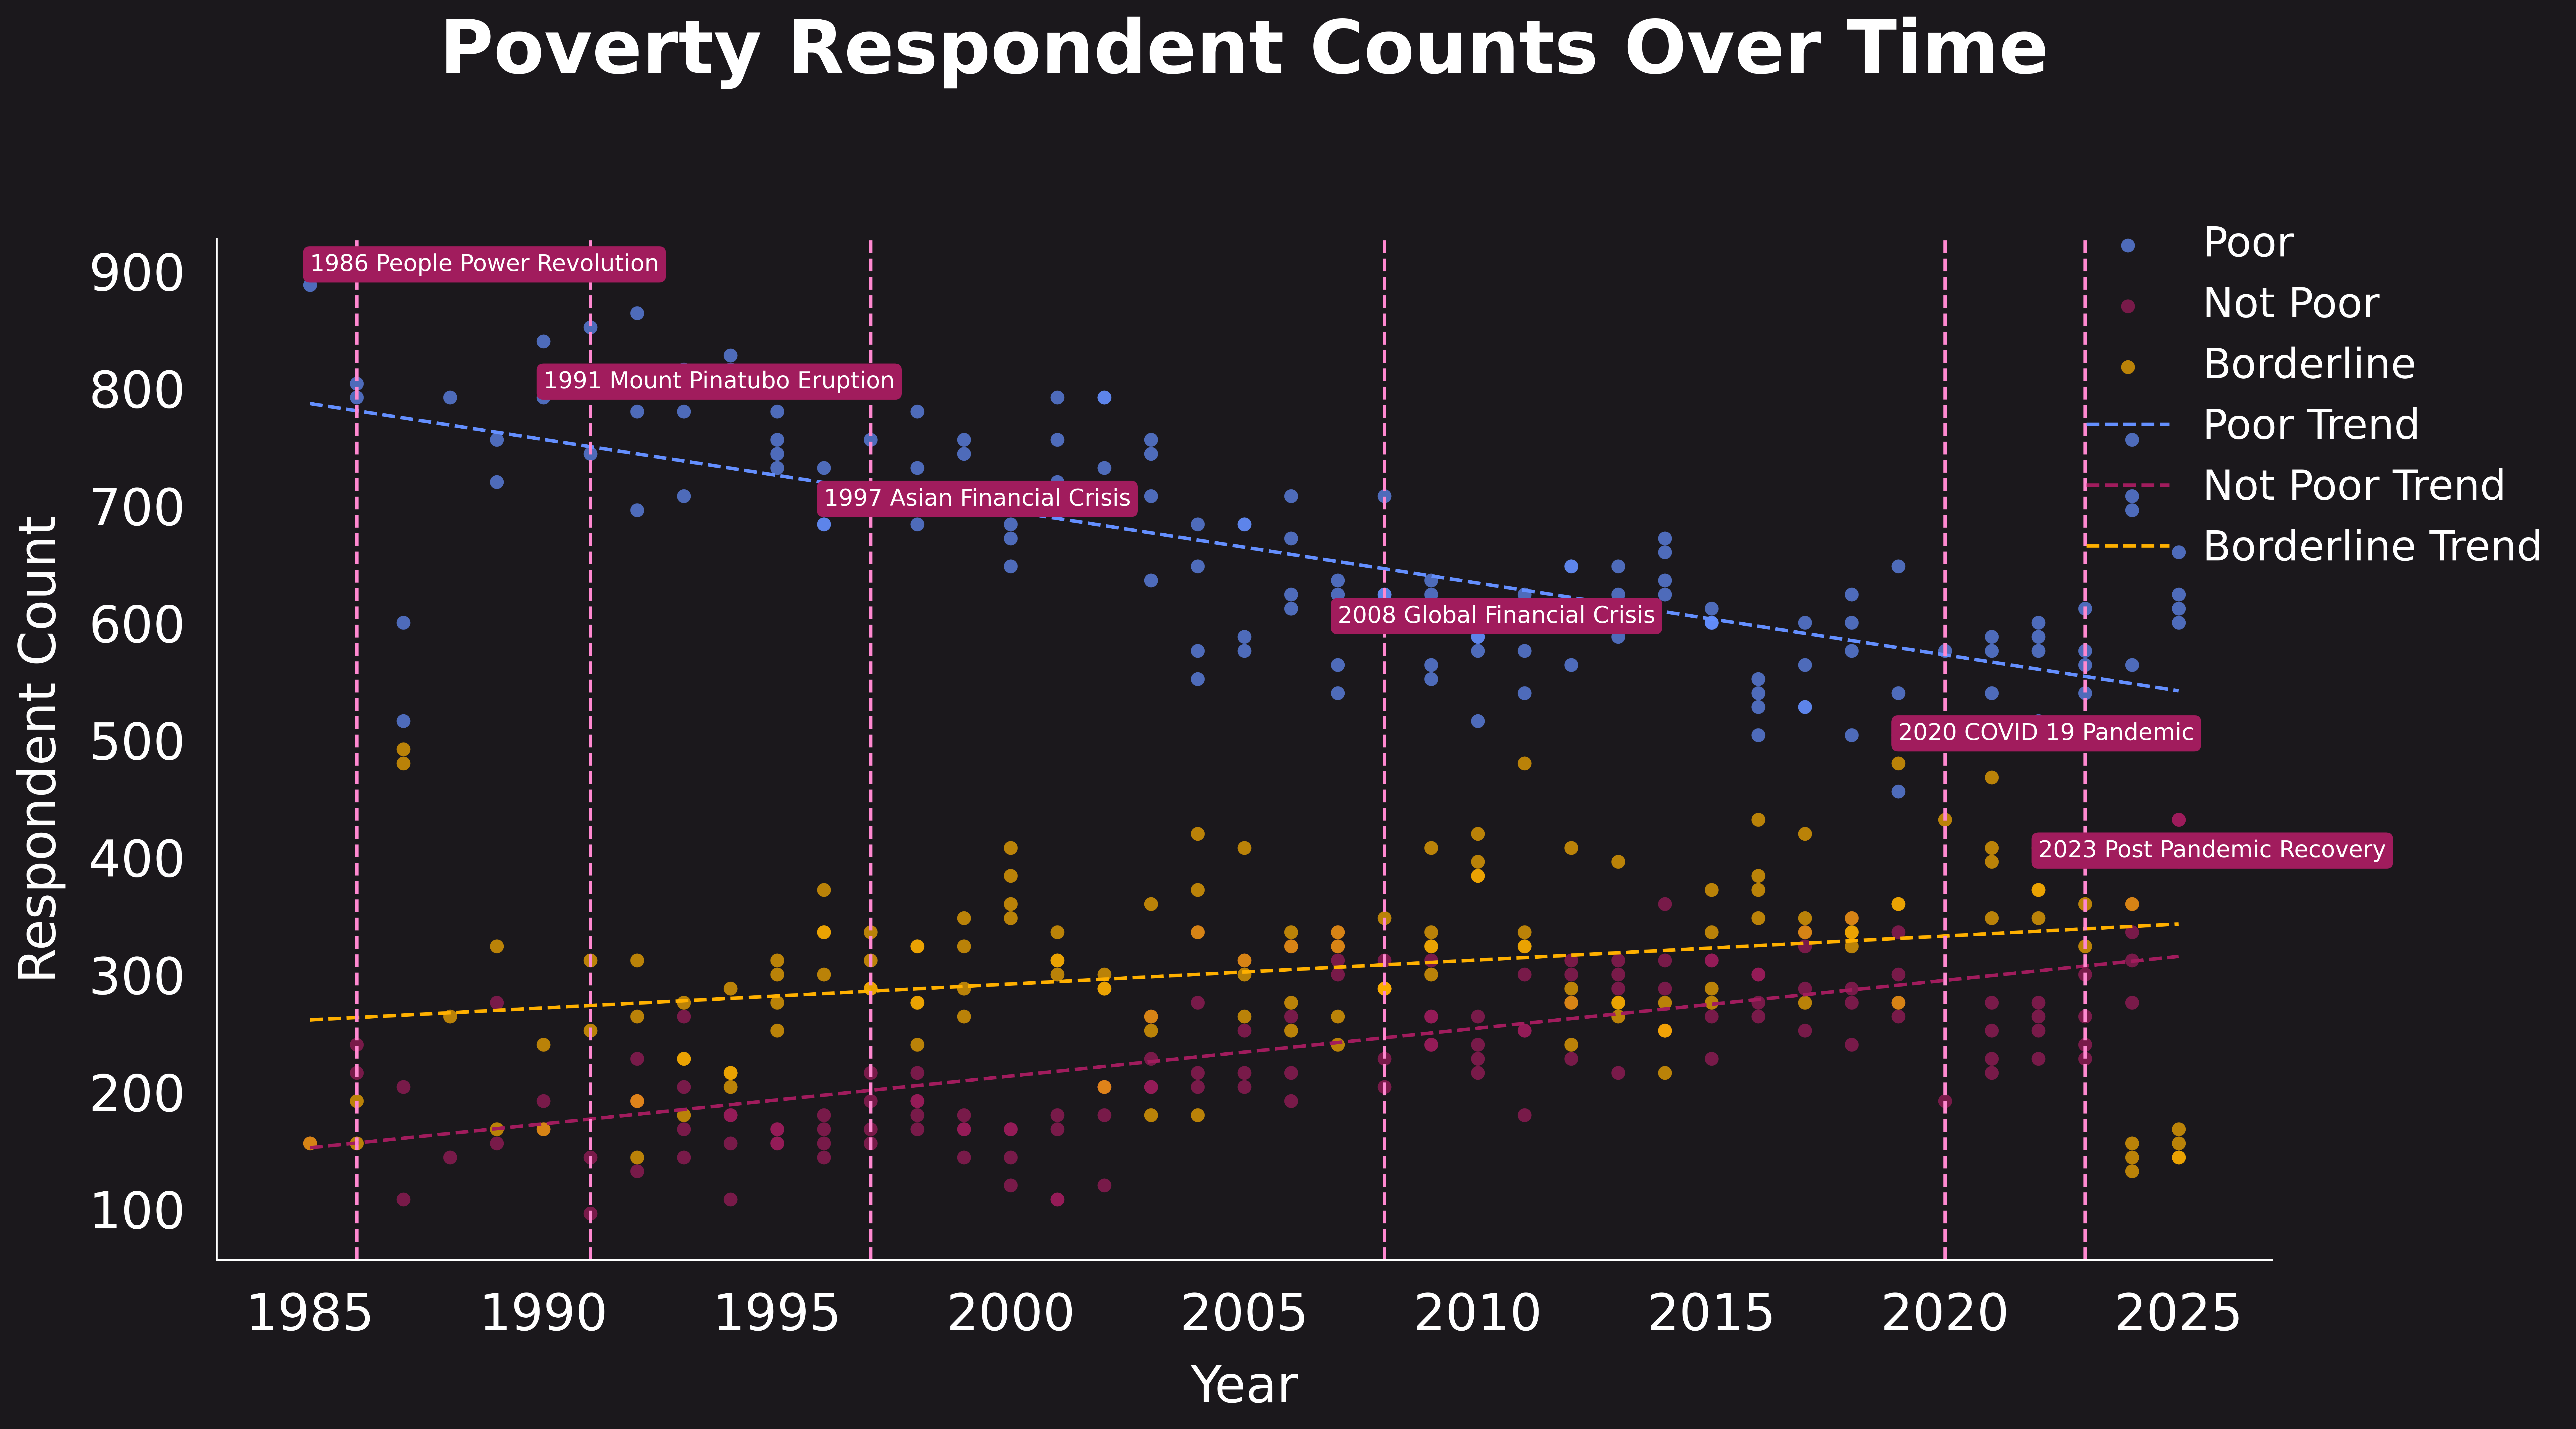

In [24]:
# Create the combined plot
plt.figure()

# Scatter plots
plt.scatter(x, y_poor, color=colors[0], label='Poor', alpha=0.7)
plt.scatter(x, y_not_poor, color=colors[2], label='Not Poor', alpha=0.7)
plt.scatter(x, y_borderline, color=colors[4], label='Borderline', alpha=0.7)

# Regression lines
# Generate points for the regression line across the range of years
x_range = np.array([[x.min()], [x.max()]])
y_pred_poor_line = model_poor.predict(x_range)
y_pred_not_poor_line = model_not_poor.predict(x_range)
y_pred_borderline_line = model_borderline.predict(x_range)

plt.plot(x_range, y_pred_poor_line, color=colors[0], linestyle='--', label='Poor Trend')
plt.plot(x_range, y_pred_not_poor_line, color=colors[2], linestyle='--', label='Not Poor Trend')
plt.plot(x_range, y_pred_borderline_line, color=colors[4], linestyle='--', label='Borderline Trend')

# Events
# 1986 People Power Revolution
specific_year = 1986
plt.axvline(x=specific_year, color='#FF88D0', linestyle='--', )
plt.annotate(
    f'1986 People Power Revolution',
    xy=(specific_year, 900),
    xytext=(specific_year-1, 900),  # Adjust position for clarity
    arrowprops=dict(facecolor=colors[2], arrowstyle='->', lw=1.5),
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='white', facecolor=colors[2])  # Text box style
)
# 1991 Mount Pinatubo Eruption
specific_year = 1991
plt.axvline(x=specific_year, color='#FF88D0', linestyle='--', )
plt.annotate(
    f'1991 Mount Pinatubo Eruption',
    xy=(specific_year, 800),
    xytext=(specific_year-1, 800),  # Adjust position for clarity
    arrowprops=dict(facecolor=colors[2], arrowstyle='->', lw=1.5),
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='white', facecolor=colors[2])  # Text box style
)
# 1997 Asian Financial Crisis
specific_year = 1997
plt.axvline(x=specific_year, color='#FF88D0', linestyle='--', )
plt.annotate(
    f'1997 Asian Financial Crisis',
    xy=(specific_year, 700),
    xytext=(specific_year-1, 700),  # Adjust position for clarity
    arrowprops=dict(facecolor=colors[2], arrowstyle='->', lw=1.5),
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='white', facecolor=colors[2])  # Text box style
)
# 2008 Global Financial Crisis
specific_year = 2008
plt.axvline(x=specific_year, color='#FF88D0', linestyle='--', )
plt.annotate(
    f'2008 Global Financial Crisis',
    xy=(specific_year, 600),
    xytext=(specific_year-1, 600),  # Adjust position for clarity
    arrowprops=dict(facecolor=colors[2], arrowstyle='->', lw=1.5),
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='white', facecolor=colors[2])  # Text box style
)
# 2020 COVID 19 Pandemic
specific_year = 2020
plt.axvline(x=specific_year, color='#FF88D0', linestyle='--', )
plt.annotate(
    f'2020 COVID 19 Pandemic',
    xy=(specific_year, 500),
    xytext=(specific_year-1, 500),  # Adjust position for clarity
    arrowprops=dict(facecolor=colors[2], arrowstyle='->', lw=1.5),
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='white', facecolor=colors[2])  # Text box style
)
# 2023 Post Pandemic Recovery
specific_year = 2023
plt.axvline(x=specific_year, color='#FF88D0', linestyle='--', )
plt.annotate(
    f'2023 Post Pandemic Recovery',
    xy=(specific_year, 400),
    xytext=(specific_year-1, 400),  # Adjust position for clarity
    arrowprops=dict(facecolor=colors[2], arrowstyle='->', lw=1.5),
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='white', facecolor=colors[2])  # Text box style
)
# Customize the plot
plt.xlabel('Year')
plt.ylabel('Respondent Count')
plt.title('Poverty Respondent Counts Over Time', fontdict={'family': 'Roboto', 'weight': 'bold'})
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05))

plt.show()